In [1]:
import pandas as pd
from fastai.vision.all import *

In [3]:
df = pd.read_csv('../data/output/fastai_multilabel_df.csv')

In [4]:
df.head()

,fname,labels,is_valid
0,id_000644bb2.jpg,gsk_inhibitor,False
1,id_000779bfc.jpg,none,False
2,id_000a6266a.jpg,bcr-abl_inhibitor kit_inhibitor pdgfr_inhibitor,False
3,id_0015fd391.jpg,none,True
4,id_001626bd3.jpg,calcium_channel_blocker,False


In [5]:
dls = ImageDataLoaders.from_df(df, folder='../images/train', valid_col='is_valid',
                              label_delim=' ', item_tfms=Resize(224))

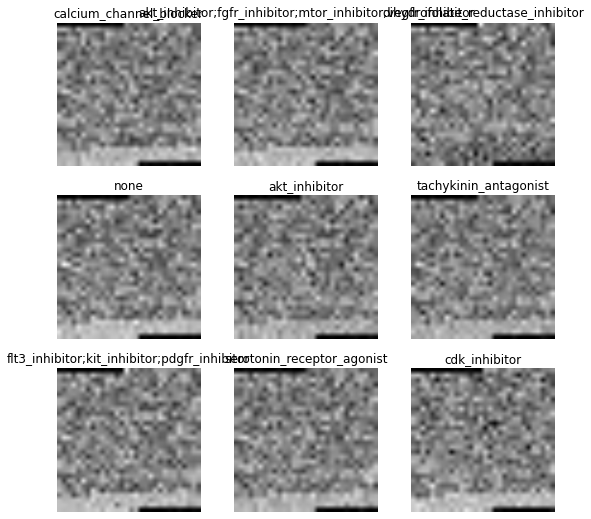

In [6]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.03981071710586548)

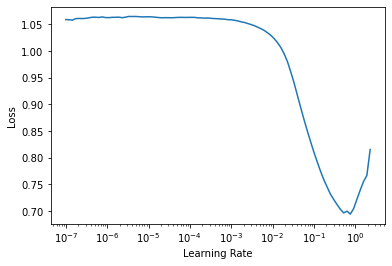

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(4, 4e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.034887,0.026643,0.994801,01:15


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.025041,0.024000,0.994856,01:41
1,0.023289,0.040924,0.994952,01:40
2,0.021903,0.021074,0.995218,01:40
3,0.020597,0.020895,0.995268,01:40


In [46]:
learn.save('model1')

Path('models/model1.pth')

In [7]:
learn.load('model1')

In [8]:
preds = learn.get_preds()

In [9]:
preds[0].shape

torch.Size([4389, 207])

In [10]:
preds[1].shape

torch.Size([4389, 207])

In [11]:
preds[0][:5]

tensor([[0.0006, 0.0002, 0.0008,  ..., 0.0003, 0.0003, 0.0005],
        [0.0001, 0.0002, 0.0005,  ..., 0.0006, 0.0016, 0.0010],
        [0.0011, 0.0011, 0.0017,  ..., 0.0007, 0.0008, 0.0015],
        [0.0010, 0.0010, 0.0011,  ..., 0.0013, 0.0006, 0.0021],
        [0.0007, 0.0005, 0.0010,  ..., 0.0014, 0.0018, 0.0025]])

In [12]:
preds[1][:5]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [13]:
learn.dls.valid_ds.vocab

(#207) ['11-beta-hsd1_inhibitor','5-alpha_reductase_inhibitor','acat_inhibitor','acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist','acetylcholinesterase_inhibitor','adenosine_receptor_agonist','adenosine_receptor_antagonist','adenylyl_cyclase_activator','adrenergic_receptor_agonist'...]

In [15]:
train_ids = df.fname[df.is_valid == False].str.replace('\.jpg', '')
train_ids.to_csv('../data/output/fastai_train_ids.csv', index=False)
valid_ids = df.fname[df.is_valid == True].str.replace('\.jpg', '')
valid_ids.to_csv('../data/output/fastai_valid_ids.csv', index=False)

In [30]:
train_ids.head()

0    id_000644bb2
1    id_000779bfc
2    id_000a6266a
4    id_001626bd3
5    id_001762a82
Name: fname, dtype: object

In [16]:
vocab = learn.dls.valid_ds.vocab
print(vocab)

(#207) ['11-beta-hsd1_inhibitor','5-alpha_reductase_inhibitor','acat_inhibitor','acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist','acetylcholinesterase_inhibitor','adenosine_receptor_agonist','adenosine_receptor_antagonist','adenylyl_cyclase_activator','adrenergic_receptor_agonist'...]


In [17]:
pd.Series(vocab).to_csv('../data/output/fastai_vocab.csv', index=False)

In [18]:
np.save('../data/output/fastai_predictions.npy', preds[0].numpy())